In [ ]:
import numpy as np
from scipy.signal import convolve2d
from PIL import Image

# 1. Cargar imagen y convertir a escala de grises
img = Image.open("p.jpeg").convert("L")  # Asegúrate de tener "input.png" en la carpeta
image_array = np.array(img)


#exportar en un archivo .txt los valores de la imagen en blanco y negro
np.savetxt("imagen.txt", image_array, fmt='%d')

# 2. Definir kernel (por ejemplo, detección de bordes horizontales)
kernel = np.array([
    [1, 1, 1],
    [ 0,  0,  0],
    [ -1,  -1,  -1]
])

kernel2 = np.array([
    [-1,   0,  1],
    [ -1,  0,  1],
    [ -1,  0,  1]
])

# 3. Aplicar convolución 2D
output2 = convolve2d(image_array, kernel, mode='same', boundary='fill', fillvalue=0)
h = image_array.shape[0] + 2
w = image_array.shape[1] + 2

new_matrix = np.zeros((h,w))

new_matrix[1:-1, 1:-1] = image_array
#print(new_matrix)

result_matrix = np.zeros((image_array.shape))
result_matrix2 = np.zeros((image_array.shape))

alto = result_matrix.shape[0]
ancho = result_matrix.shape[1]

for i in range(alto):
    for j in range(ancho):
        window = new_matrix[i:i+3, j:j+3]
        if window.shape == (3, 3):
            result_matrix[i, j] = np.sum(window * kernel)
            #result_matrix2[i,j] = np.sum(window * kernel2)  
        

fin = np.sqrt( np.power(result_matrix,2) + np.power(result_matrix2,2))

# 4. Normalizar resultado para que esté en rango 0-255
convolved = np.clip(result_matrix, 0, 255).astype(np.uint8)

# 5. Guardar imagen resultante
output_img = Image.fromarray(convolved)
output_img.save("output.png")


convolved = np.clip(output2, 0, 255).astype(np.uint8)

# 5. Guardar imagen resultante
output_img = Image.fromarray(convolved)
output_img.save("output2.png")


print("Imagen exportada como 'output.png'")


Imagen exportada como 'output.png'


In [33]:

# 1. Cargar imagen y convertir a escala de grises
img = Image.open("strawberry_f_forever.jpg").convert("L")  # Asegúrate de tener "input.png" en la carpeta
image_array = np.array(img)


#hacer un padding de 1 pixel a image_array
image_array = np.pad(image_array, (1, 1), mode='constant', constant_values=0)
    
L = 1 #cantidad de imagenes
M, N = image_array.shape
P = 1 #padding
                 
#linealizar image_array
image_array = image_array.reshape(-1)
#exportar en un archivo .txt los valores de la imagen en blanco y negro


with open("imagen2.txt", "w") as archivo:
    archivo.write(f"{L} {M} {N} {P}\n")  # Escribe las dimensiones y el padding
    archivo.write(" ".join(map(str, image_array)))  # usa ",".join(...) si quieres separado por comas

#usar el archivo .txt para cargar la imagen
image_array = np.loadtxt("image.txt", dtype=int)
#hacer un plot de image_array
#import matplotlib.pyplot as plt
#plt.imshow(image_array, cmap='gray')
#plt.show()

In [44]:
import numpy as np
from scipy.signal import convolve2d
from PIL import Image

# 1. Cargar imagen y convertir a escala de grises
img = Image.open("strawberry_f_forever.jpg").convert("L")
image_array = np.array(img)

# 2. Definir kernels (detección de bordes horizontal y vertical tipo Sobel)
kernel_h = np.array([
    [1,  1,  1],
    [0,  0,  0],
    [-1, -1, -1]
])

kernel_v = np.array([
    [-1,  0,  1],
    [-1,  0,  1],
    [-1,  0,  1]
])

# 3. Convolución automática con scipy (para comparar)
output2 = convolve2d(image_array, kernel_h, mode='same', boundary='fill', fillvalue=0)

# 4. Crear imagen con padding (para la convolución manual)
padded = np.pad(image_array, pad_width=1, mode='constant', constant_values=0)

# 5. Crear matrices de resultado
result_h = np.zeros_like(image_array, dtype=float)
result_v = np.zeros_like(image_array, dtype=float)

# 6. Convolución manual
for i in range(image_array.shape[0]):
    for j in range(image_array.shape[1]):
        window = padded[i:i+3, j:j+3]
        result_h[i, j] = np.sum(window * kernel_h)
        result_v[i, j] = np.sum(window * kernel_v)

# 7. Magnitud del gradiente combinando las dos direcciones
magnitude = np.sqrt(result_h**2 + result_v**2)

# 8. Normalizar resultados
output_manual = np.clip(magnitude, 0, 255).astype(np.uint8)
output_automatic = np.clip(output2, 0, 255).astype(np.uint8)

# 9. Guardar resultados
Image.fromarray(output_manual).save("output.png")
Image.fromarray(output_automatic).save("output2.png")

print("Imágenes exportadas como 'output.png' (manual) y 'output2.png' (automática)")


Imágenes exportadas como 'output.png' (manual) y 'output2.png' (automática)


In [ ]:
convolved_naive = convolve2d(result_matrix, kernel2, mode='same', boundary='fill', fillvalue=0)

#fin = np.sqrt( np.power(convolved,2) + np.power(convolved2,2))

# 4. Normalizar resultado para que esté en rango 0-255
convolved = np.clip(result_matrix, 0, 255).astype(np.uint8)

# 5. Guardar imagen resultante
output_img = Image.fromarray(convolved)
output_img.save("output.png")

#convolved2 = convolve2d(image_array, kernel2, mode='same', boundary='fill', fillvalue=0)

#fin = np.sqrt( np.power(convolved,2) + np.power(convolved2,2))

# 4. Normalizar resultado para que esté en rango 0-255
#convolved = np.clip(fin, 0, 255).astype(np.uint8)

# 5. Guardar imagen resultante
#output_img = Image.fromarray(convolved)
#output_img.save("output.png")

In [18]:
import numpy as np
from scipy.signal import convolve2d
from PIL import Image

# 1. Cargar imagen a color
img = Image.open("a.jpeg").convert("RGB")
img_array = np.array(img)

# 2. Definir kernel (ejemplo: sharpen)
kernel = np.array([
    [ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0]
])

# 3. Aplicar convolución por cada canal (R, G, B)
channels = []
for c in range(3):
    convolved = convolve2d(img_array[:, :, c], kernel, mode='same', boundary='symm')
    convolved = np.clip(convolved, 0, 255).astype(np.uint8)
    channels.append(convolved)

# 4. Reunir los canales y guardar la imagen
output_array = np.stack(channels, axis=2)
output_img = Image.fromarray(output_array)
output_img.save("output_rgb.png")

print("Imagen exportada como 'output_rgb.png'")


Imagen exportada como 'output_rgb.png'


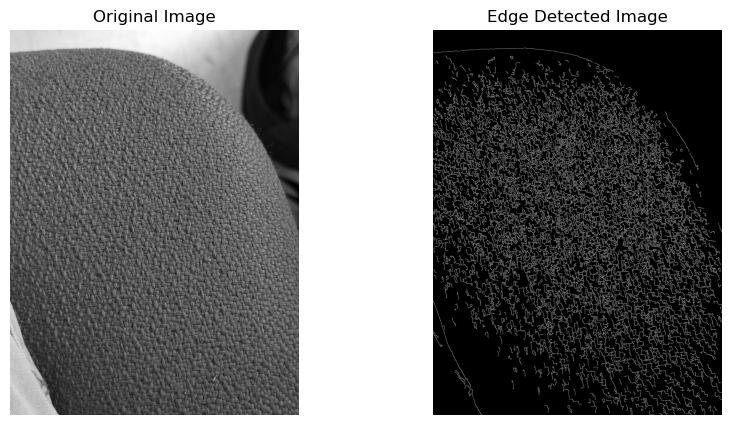

In [7]:
# Step 1: Import necessary libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Upload an image
img = Image.open("a.jpeg").convert("RGB")
img_array = np.array(img)

# Step 3: Read the uploaded image
image = cv2.imread("a.jpeg", cv2.IMREAD_GRAYSCALE)

# Step 4: Apply Gaussian Blur to reduce noise
blurred_image = cv2.GaussianBlur(image, (5, 5), 1.4)

# Step 5: Apply Canny edge detector
edges = cv2.Canny(blurred_image, 50, 150)

# Step 6: Display the original image and the edge-detected image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Edge Detected Image')
plt.imshow(edges, cmap='gray')
plt.axis('off')

convolved = np.clip(edges, 0, 255).astype(np.uint8)

# 5. Guardar imagen resultante
output_img = Image.fromarray(convolved)
output_img.save("edges_cany.png")


plt.show()